In [376]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import Pulses, JJ, L, R, C, Ib,MutualInductance,Square_pulse,JTL,Pulses, Pulse_Merger,Sine_current,Synaps, Neuron
from FunctionCompiler import *

L_in = L.L(loc=[5,6],val=1)
J01 = JJ.JJ(loc=[7,0],A=-1, r=1, c=1)
J02 = JJ.JJ(loc=[8,0],A=-1, r=1, c=1)

kx_1 = MutualInductance.MutualInductance(L1=2, L2=2, k=1, loc=[1,2,6,7])

kx_2 = MutualInductance.MutualInductance(L1=2, L2=2, k=1, loc=[2,0,6,8])

kd_1 = MutualInductance.MutualInductance(L1=1, L2=1, k=1, loc=[6,7,4,3])

kd_2 = MutualInductance.MutualInductance(L1=1, L2=1, k=1, loc=[6,8,4,0])

k_out = MutualInductance.MutualInductance(L1=10, L2=12, k=1, loc=[6,0,9,0])

pulses_in =  Pulses.Pulses(loc=[5],A=3, t0=100)
pulses_x =  Sine_current.Sine_current(loc=[1],A=1, t0=50,length=300,w=0.1)
pulses_d =  Ib.Ib(loc=[3],val=1)

R_add = R.R(loc=[9,0],r=1)

In [377]:
t = np.arange(0, 200, 0.1)
fc = FunctionCompiler([pulses_in, pulses_d, pulses_x, L_in, J01, J02, kx_1, kx_2, kd_1, kd_2, k_out, R_add], t)

sol = fc.solve()

In [379]:
V_J01 = J01.get_data("V",t,sol)
V_J02 = J02.get_data("V",t,sol)

I_in = pulses_in.get_data("I",t,sol)
I_L_q = k_out.get_data("I1",t,sol)
I_L_out= R_add.get_data("I",t,sol)

fig, ax = plt.subplots(dpi=100)

ax.plot(t,I_in)
#ax.plot(t,I_L_q)
ax.plot(t,I_L_out)
ax.legend(['In', 'L_out'])

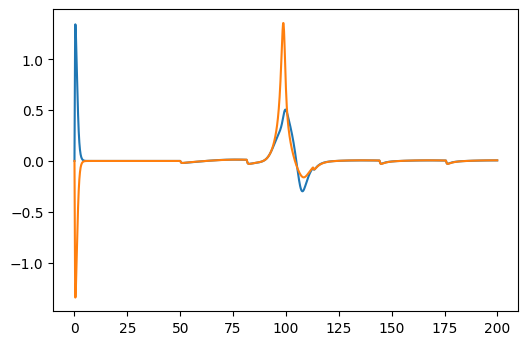

In [380]:
fig, ax= plt.subplots(dpi=100)
ax.plot(t,V_J01)
ax.plot(t,V_J02)

# $Pi$ Inverter

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import Pulses, JJ, L, R, C, Ib,MutualInductance,Square_pulse,JTL,Pulses, Pulse_Merger,Sine_current,Synaps, Neuron
from FunctionCompiler import *

In [62]:
L_in = L.L(loc=[5,6],val=0.317)
J01 = JJ.JJ(loc=[7,0],A=-0.4, r=1, c=1)
J02 = JJ.JJ(loc=[8,0],A=-0.4, r=1, c=1)

kx_1 = MutualInductance.MutualInductance(L1=20, L2=0.52, k=1, loc=[1,2,6,7])
kx_2 = MutualInductance.MutualInductance(L1=20, L2=0.52, k=1, loc=[2,0,6,8])
kd_1 = MutualInductance.MutualInductance(L1=0.52, L2=20, k=1, loc=[6,7,3,4])
kd_2 = MutualInductance.MutualInductance(L1=0.52, L2=20, k=1, loc=[6,8,4,0])

L_q1 = L.L(loc=[6,0],val=2.566)
J_3 = JJ.JJ(loc=[6,9],A=-0.24, c=1,r=1)
L_q2 = L.L(loc=[9,0],val=3.019)

pulses_x =  Pulses.Pulses(loc=[1],A=1, t0=5, T=10)
#pulses_in_2 =  Pulses.Pulses(loc=[5],A=-1.5, t0=40, T=50)
pulses_in =  Sine_current.Sine_current(loc=[5],A=5, t0=10,length=10,w=1)
pulses_d =  Ib.Ib(loc=[3],val=1)

L_out = L.L(loc=[9,10],val=3.019)
R_add = R.R(loc=[10,0],r=1)

In [63]:
t = np.arange(0, 50, 0.1)
fc = FunctionCompiler([pulses_in, pulses_d, pulses_x, L_in, J01, J02, kx_1, kx_2, kd_1, kd_2, L_q1, L_q2, J_3, L_out, R_add], t)

sol = fc.solve()

In [64]:
V_J01 = J01.get_data("V",t,sol)
V_J02 = J02.get_data("V",t,sol)

I_in = pulses_in.get_data("I",t,sol)
I_J_3 = J_3.get_data("I",t,sol)
I_out= R_add.get_data("I",t,sol)

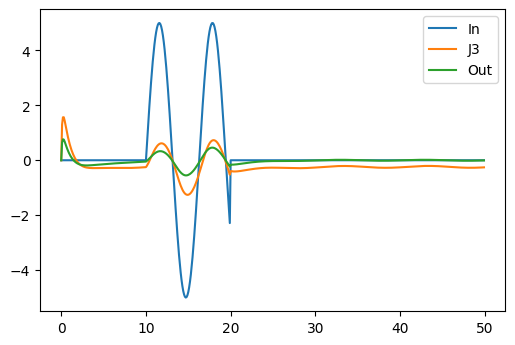

In [65]:
fig, ax = plt.subplots(dpi=100)

ax.plot(t,I_in)
ax.plot(t,I_J_3)
ax.plot(t,I_out)
ax.legend(['In','J3', 'Out'])